Train Mountain Car

OpenAI Gym has been designed in such a way that all environments provide the same API - i.e. the same methods reset, step and render, and the same abstractions of action space and observation space. Thus is should be possible to adapt the same reinforcement learning algorithms to different environments with minimal code changes.

A Mountain Car Environment

Mountain Car environment contains a car stuck in a valley:

The goal is to get out of the valley and capture the flag, by doing at each step one of the following actions:

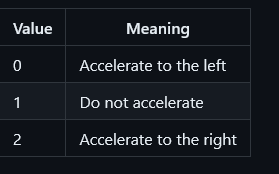

The main trick of this problem is, however, that the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

Observation space consists of just two values:

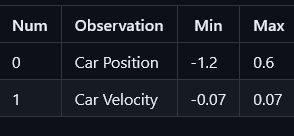

Reward system for the mountain car is rather tricky:

 .   Reward of 0 is awarded if the agent reached the flag (position = 0.5) on top of the mountain.

 .   Reward of -1 is awarded if the position of the agent is less than 0.5.


Episode terminates if the car position is more than 0.5, or episode length is greater than 200.

Instructions

Adapt our reinforcement learning algorithm to solve the mountain car problem. Start with existing notebook.ipynb code, substitute new environment, change state discretization functions, and try to make existing algorithm to train with minimal code modifications. Optimize the result by adjusting hyperparameters.

In [1]:
import sys
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
env = gym.make("MountainCar-v0",render_mode = "human")
print(env.action_space)
print(env.observation_space)
print(env.action_space.sample())

Discrete(3)
Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
1


In [3]:
env = gym.make("MountainCar-v0",render_mode = "human")
observation, info = env.reset()

for i in range(200):
   action = env.action_space.sample()  # agent policy that uses the observation and info
   observation, reward, terminated, truncated, info = env.step(action)
   #if terminated or truncated:
     # observation, info = env.reset()
env.close()

In [4]:
env = gym.make("MountainCar-v0", render_mode = "human")
observation, info = env.reset()
terminated = False
truncated = False

while not terminated and not truncated:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    print(f"{observation} -> {reward}")
   
env.close()

[-5.1747125e-01 -4.6301186e-05] -> -1.0
[-0.5185635  -0.00109226] -> -1.0
[-0.5196935  -0.00113002] -> -1.0
[-5.1985282e-01 -1.5930725e-04] -> -1.0
[-0.5210402 -0.0011874] -> -1.0
[-0.5232468  -0.00220659] -> -1.0
[-0.525456   -0.00220923] -> -1.0
[-0.52865136 -0.0031953 ] -> -1.0
[-0.5328087  -0.00415741] -> -1.0
[-0.5378971  -0.00508834] -> -1.0
[-0.5438782  -0.00598114] -> -1.0
[-0.55070734 -0.00682914] -> -1.0
[-0.5563334  -0.00562605] -> -1.0
[-0.56071436 -0.00438093] -> -1.0
[-0.5658175  -0.00510314] -> -1.0
[-0.5696048  -0.00378734] -> -1.0
[-0.57304823 -0.00344339] -> -1.0
[-0.5761221  -0.00307388] -> -1.0
[-0.5778037  -0.00168158] -> -1.0
[-0.5790805  -0.00127684] -> -1.0
[-0.58094317 -0.00186264] -> -1.0
[-0.58237785 -0.00143468] -> -1.0
[-0.58437395 -0.00199612] -> -1.0
[-0.58591676 -0.00154282] -> -1.0
[-0.58699495 -0.00107816] -> -1.0
[-0.58760047 -0.00060555] -> -1.0
[-5.877290e-01 -1.284777e-04] -> -1.0
[-0.58837944 -0.00065046] -> -1.0
[-5.8854705e-01 -1.6766084e-04] ->

In [5]:
print(env.observation_space.low)
print(env.observation_space.high)

[-1.2  -0.07]
[0.6  0.07]


In [10]:
def discretize(x):
    return tuple(((x - np.array([-1.2, -0.07])) / np.array([0.1, 0.01])).astype(int))

In [6]:
Q = {}
actions = (0,1,2)

def qvalues(state):
    return [Q.get((state,a),0) for a in actions]

In [7]:
# hyperparameters
alpha = 0.3
gamma = 0.9
epsilon = 0.90

In [8]:
def probs(v,eps=1e-4):
    v = v-v.min()+eps
    v = v/v.sum()
    return v

In [13]:
env = gym.make("MountainCar-v0", render_mode = "human")
Qmax = 0
cum_rewards = []
rewards = []
for epoch in range(1000):
    observation, info = env.reset()
    cum_reward=0
    terminated = False
    truncated = False
    # == do the simulation ==
    while not terminated and not truncated:
        s = discretize(observation)
        if random.random()<epsilon:
        # exploitation - chose the action according to Q-Table probabilities
            v = probs(np.array(qvalues(s)))
            a = random.choices(actions,weights=v)[0]
        else:
        # exploration - randomly chose the action
            a = np.random.randint(env.action_space.n)

        observation, reward, terminated, truncated, info = env.step(a)
        cum_reward+=reward
        ns = discretize(observation)
        Q[(s,a)] = (1 - alpha) * Q.get((s,a),0) + alpha * (reward + gamma * max(qvalues(ns)))
    
                
    cum_rewards.append(cum_reward)
    rewards.append(cum_reward)
    # == Periodically print results and calculate average reward ==
    if epoch%50==0:
        print(f"{epoch}: {np.average(cum_rewards)}, alpha={alpha}, epsilon={epsilon}")
        if np.average(cum_rewards) > Qmax:
            Qmax = np.average(cum_rewards)
            Qbest = Q
        cum_rewards=[]



0: -200.0, alpha=0.3, epsilon=0.9
50: -200.0, alpha=0.3, epsilon=0.9
100: -200.0, alpha=0.3, epsilon=0.9
150: -200.0, alpha=0.3, epsilon=0.9
200: -200.0, alpha=0.3, epsilon=0.9
250: -200.0, alpha=0.3, epsilon=0.9
300: -200.0, alpha=0.3, epsilon=0.9
350: -200.0, alpha=0.3, epsilon=0.9
400: -200.0, alpha=0.3, epsilon=0.9
450: -200.0, alpha=0.3, epsilon=0.9
500: -200.0, alpha=0.3, epsilon=0.9
550: -200.0, alpha=0.3, epsilon=0.9
600: -200.0, alpha=0.3, epsilon=0.9
650: -200.0, alpha=0.3, epsilon=0.9
700: -199.74, alpha=0.3, epsilon=0.9
750: -199.5, alpha=0.3, epsilon=0.9
800: -200.0, alpha=0.3, epsilon=0.9
850: -200.0, alpha=0.3, epsilon=0.9
900: -200.0, alpha=0.3, epsilon=0.9
950: -200.0, alpha=0.3, epsilon=0.9
